# Introduction to Scikit Learn

## 2.1 What is Scikit-Learn
![image](https://user-images.githubusercontent.com/43855029/114609814-30db9f80-9c6d-11eb-8d4e-781f578e1d79.png)

- Scikit-learn is probably the most useful library for machine learning in Python. 
- The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
- The sklearn package contains tools for:

```
  - data splitting
  - pre-processing
  - feature selection
  - model tuning using resampling
  - variable importance estimation
  as well as other functionality.
  
```
## 2.2 Install `sklearn`
Scikit-learn is included in the base conda environment available on Palmetto. Follow these instructions to install into your custom environment: https://scikit-learn.org/stable/install.html

## 2.3 Pre-processing using `sklearn`
There are several steps that we will use `sklearn` for. For preprocessing raw data, we gonna use `sklearn` in these tasks:
- Preprocessing with missing value
- Preprocessing: transform data

### 2.3.1 Pre-processing with missing value
- Most of the time the input data has missing values (`NA, NaN, Inf`) due to data collection issue (power, sensor, personel). 
- There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency
- These missing values need to be treated/cleaned before we can use because "Garbage in => Garbage out".

In [20]:
import pandas as pd
data_df = pd.DataFrame(pd.read_csv('/zfs/citi/workshop_data/python_ml/r_airquality.csv'))
data_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


- There are several ways to treat the missing values:
- Method 1: remove all missing `NA` values

In [9]:
data1 = data_df.dropna()
data1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


- Method 2: Set `NA` to mean value 

In [10]:
data2 = data_df.copy()
data2.fillna(data2.mean(), inplace=True)
data2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


- Method 3: Use `Impute` to handle missing values

In statistics, imputation is the process of replacing missing data with substituted values. 
Because missing data can create problems for analyzing data, imputation is seen as a way to 
avoid pitfalls involved with listwise deletion of cases that have missing values. That is to 
say, when one or more values are missing for a case, most statistical packages default to discarding 
any case that has a missing value, which may introduce bias or affect the representativeness of the 
results. Imputation preserves all cases by replacing missing data with an estimated value based on 
other available information. Once all missing values have been imputed, the data set can then be 
analysed using standard techniques for complete data. There have been many theories embraced by 
scientists to account for missing data but the majority of them introduce bias. A few of the well 
known attempts to deal with missing data include: 
- hot deck and cold deck imputation; 
- listwise and pairwise deletion; 
- mean imputation; 
- non-negative matrix factorization; 
- regression imputation; 
- last observation carried forward; 
- stochastic imputation; 
- and multiple imputation.

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data3 = pd.DataFrame(imputer.fit_transform(data_df))
data3.columns = data_df.columns
data3.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0


**Note:**
SimpleImputer converts missing values to **mean, median, most_frequent and constant**.

---

**Question**: How do we decide the right imputation strategy? 

---

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data4 = pd.DataFrame(imputer.fit_transform(data_df))
data4.columns = data_df.columns
data4.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,31.5,205.0,14.3,56.0,5.0,5.0


`knnImpute` can also be used to fill in missing value

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_knnimpute = pd.DataFrame(imputer.fit_transform(data_df))
data_knnimpute.head()

,0,1,2,3,4,5
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,18.5,206.0,14.3,56.0,5.0,5.0


**Note:**
- In addition to KNNImputer, there are **IterativeImputer** (Multivariate imputer that estimates each feature from all the others) and **MissingIndicator**(Binary indicators for missing values)
- More information on sklearn.impute can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)

### 2.3.2 Pre-processing with Transforming data
#### 2.3.2.1 Using Standardization
![image](https://user-images.githubusercontent.com/43855029/114231774-df6ba180-9948-11eb-9c61-3d2e0d3df889.png)

- Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units for example: rainfall (0-1000mm), temperature (-10 to 40oC), humidity (0-100%), etc.
- Standardition Convert all independent variables into the same scale (mean=0, std=1) 
- These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.
- The example below use data from above:

In [18]:
from sklearn.preprocessing import scale
data_std = pd.DataFrame(scale(data3, axis=0, with_mean=True, with_std=True))
data_std.columns = data3.columns
data_std.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,-0.039487,0.046406,-0.728332,-1.153490,-1.411916,-1.675504
1,-0.214316,-0.774834,-0.557464,-0.623508,-1.411916,-1.562324
2,-1.053493,-0.421245,0.752529,-0.411515,-1.411916,-1.449144
3,-0.843698,1.449357,0.439270,-1.683472,-1.411916,-1.335965
4,0.000000,0.000000,1.236657,-2.319450,-1.411916,-1.222785


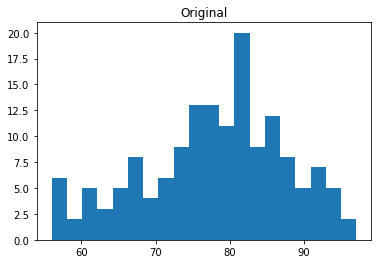

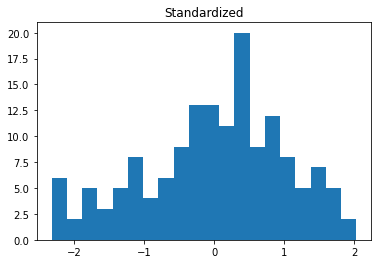

In [24]:
import matplotlib.pyplot as plt
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_std['Temp'], bins=20)
plt.title("Standardized")
plt.show()

#### 2.3.2.2 Using scaling with predefine range
Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
Formulation for this is:

```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaler = pd.DataFrame(scaler.fit_transform(data3), columns = data3.columns)
data_scaler.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.239521,0.559633,0.300000,0.268293,0.0,0.000000
1,0.209581,0.339450,0.331579,0.390244,0.0,0.033333
2,0.065868,0.434251,0.573684,0.439024,0.0,0.066667
3,0.101796,0.935780,0.515789,0.146341,0.0,0.100000
4,0.246283,0.547191,0.663158,0.000000,0.0,0.133333


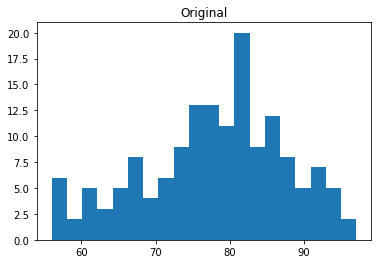

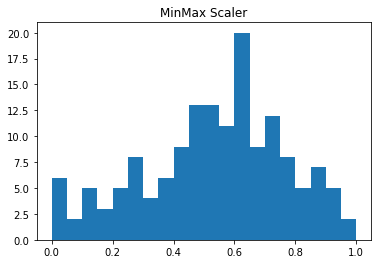

In [34]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_scaler['Temp'], bins=20)
plt.title("MinMax Scaler")
plt.show()

#### 2.3.2.3 Using Box-Cox Transformation
- A [Box Cox](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.2517-6161.1964.tb00553.x) transformation is a transformation of a non-normal dependent variables into a normal shape. 
- Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
- The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique.
- BoxCox can only be applied to stricly positive values

In [35]:
from sklearn.preprocessing import power_transform
data_BxCx = pd.DataFrame(power_transform(data3,method="box-cox"), columns = data3.columns)
data_BxCx.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.190792,0.029277,-0.696409,-1.155384,-1.441568,-1.940899
1,0.002915,-0.793127,-0.513633,-0.682490,-1.441568,-1.732923
2,-1.313959,-0.442026,0.772939,-0.481905,-1.441568,-1.553227
3,-0.879530,1.477677,0.480592,-1.587927,-1.441568,-1.389739
4,0.231016,-0.017799,1.209918,-2.054572,-1.441568,-1.237337


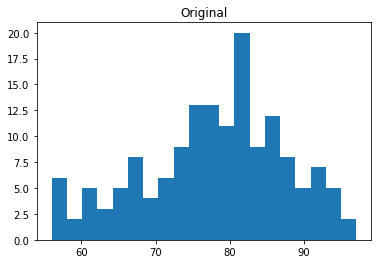

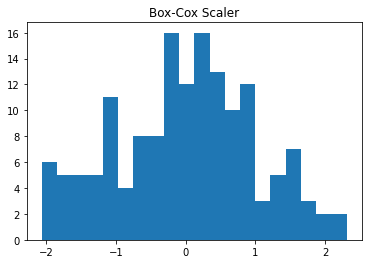

In [36]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_BxCx['Temp'], bins=20)
plt.title("Box-Cox Scaler")
plt.show()

#### 2.3.2.4 Using Yeo Johnson Transformation
While BoxCox only works with positive value, a more recent transformation method [Yeo Johnson](https://www.jstor.org/stable/2673623) can transform both positive and negative values.

In [37]:
data_yeo_johnson = pd.DataFrame(power_transform(data3,method="yeo-johnson"))
data_yeo_johnson.columns = data3.columns
data_yeo_johnson.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.196715,0.027324,-0.697609,-1.155302,-1.437509,-1.891431
1,0.007778,-0.795065,-0.514183,-0.682500,-1.437509,-1.709416
2,-1.326287,-0.444316,0.774562,-0.481950,-1.437509,-1.543376
3,-0.885431,1.480886,0.482270,-1.587780,-1.437509,-1.388286
4,0.237096,-0.019823,1.210699,-2.054440,-1.437509,-1.241399


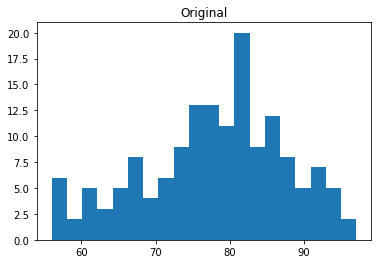

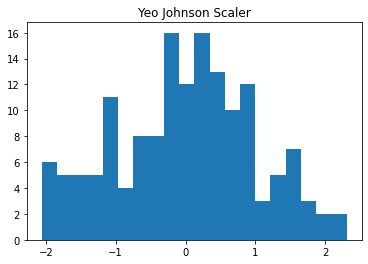

In [39]:
plt.hist(data_df['Temp'], bins=20)
plt.title("Original")
plt.show()

plt.hist(data_yeo_johnson['Temp'], bins=20)
plt.title("Yeo Johnson Scaler")
plt.show()

Graphical representation of different transformation techniques

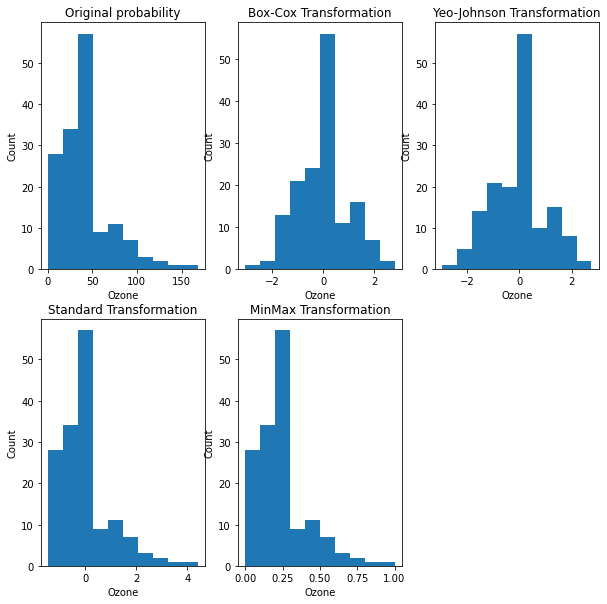

In [41]:
import matplotlib.pyplot as plt
f = plt.figure(figsize = (10,10))
ax1 = f.add_subplot(231)
ax1.hist(data3["Ozone"])
ax1.set_title("Original probability")
ax1.set_xlabel('Ozone')
ax1.set_ylabel('Count')
ax2 = f.add_subplot(232)
ax2.hist(data_BxCx["Ozone"])
ax2.set_title("Box-Cox Transformation")
ax2.set_xlabel('Ozone')
ax2.set_ylabel('Count')
ax2 = f.add_subplot(233)
ax2.hist(data_yeo_johnson["Ozone"])
ax2.set_title("Yeo-Johnson Transformation")
ax2.set_xlabel('Ozone')
ax2.set_ylabel('Count')
ax2 = f.add_subplot(234)
ax2.hist(data_std["Ozone"])
ax2.set_title("Standard Transformation")
ax2.set_xlabel('Ozone')
ax2.set_ylabel('Count')
ax2 = f.add_subplot(235)
ax2.hist(data_scaler["Ozone"])
ax2.set_title("MinMax Transformation")
ax2.set_xlabel('Ozone')
ax2.set_ylabel('Count')
plt.show()